### Sending an Image

Can we conceptualize a picture as a matrix, $M$, where $\forall m_{ij} \in M: m_{ij} = 0 \text{ or } m_{ij} = 1$ 

In [8]:
import cv2 #NOTE: This requires to install "opencv-python", but it is called cv2. Run "pip install opencv-python" in your virtual environment.
import numpy as np
import matplotlib.pyplot as plt

### NOTE: This will probably not be your path. Set your path accordingly! 
### NOTE: The script assumes that the picture you have is only black and white. Your image should be an array of zeros and ones. 
img_path = 'Emil_logo_tegn.png' #Model: Emil Rønn, Artist: Victor Møller Poulsen
img = cv2.imread(img_path, 0)

In [9]:
img_gray = img / 255 #A quirk of our image. White was 255, black is 0. Check your image.

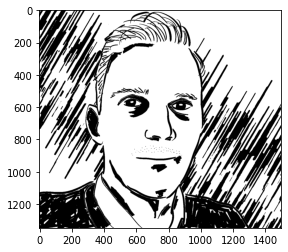

In [10]:
plt.imshow(img_gray, cmap = "gray") #show the image

In [11]:
## The dimension of the image

img_gray.shape

## Testing the functions - let's send some bits!

bits = np.array([0,1,0,1])

In [12]:
def encoder(t):
    r5 = sum(t[0:3]) % 2
    r6 = sum(t[1:4]) % 2
    r7 = (t[0] + t[2] + t[3]) % 2
    
    return np.append(t, [r5, r6, r7])    

new_bits = encoder(bits)
new_bits

array([0, 1, 0, 1, 1, 0, 1])

In [13]:
import random
def noise(t, f = 0.1):
    n = np.random.binomial(1,f,7)
    return (t + n)%2

In [14]:
r = noise(new_bits)
r

array([0, 1, 0, 1, 1, 0, 1], dtype=int32)

### Parity check matrix

In [15]:
H = np.array([[1, 1, 1, 0, 1, 0, 0],[0, 1, 1, 1, 0, 1, 0], [1, 0, 1, 1, 0, 0, 1]])


In [16]:
def get_syndrome(r):
    return r@H.transpose()%2

z = get_syndrome(r)

In [17]:
def decode(z):
    if np.all(z==np.array([0, 0, 0])):
        n = np.array([0, 0, 0, 0, 0, 0, 0])
    elif np.all(z==np.array([0, 0, 1])):
        n = np.array([0, 0, 0, 0, 0, 0, 1])
    elif np.all(z==np.array([0, 1, 0])):
        n = np.array([0, 0, 0, 0, 0, 1, 0])
    elif np.all(z==np.array([0, 1, 1])):
        n = np.array([0, 0, 0, 1, 0, 0, 0])
    elif np.all(z==np.array([1, 0, 0])):
        n = np.array([0, 0, 0, 0, 1, 0, 0])
    elif np.all(z==np.array([1, 0, 1])):
        n = np.array([1, 0, 0, 0, 0, 0, 0])
    elif np.all(z==np.array([1, 1, 0])):
        n = np.array([0, 1, 0, 0, 0, 0, 0])
    elif np.all(z==np.array([1, 1, 1])):
        n = np.array([0, 0, 1, 0, 0, 0, 0])
    else:
        print("Input is not a valid syndrome")
    return(n)

In [18]:
def get_decode(r, z):
    decoded = (r + decode(z))%2
    return decoded[0:4]

In [19]:
def hamming(t, f = 0.1):
    encoding = encoder(t)
    r = noise(encoding, f)
    z = get_syndrome(r)
    return get_decode(r, z)

## Imagine Images

In [22]:
#get shape

def decode_image(img, f, show_image = False, show_org_image = False):
    x, y = img.shape

    b = img.ravel()

    new_img = []

    for i in range(0, len(b), 4):
        new_img.append(hamming(b[0+i:4+i], f))

    flat_list = [item for sublist in new_img for item in sublist]
    
    new_img_array = np.array(flat_list)
    
    new_img_z = new_img_array.reshape((x,y))
    
    if show_image and show_org_image:
        fig, ax = plt.subplots(1, 2)
        
        ax[0].imshow(img_gray, cmap = "gray")
        ax[0].axis("off")
        ax[0].set_title("Original Image")
        ax[1].imshow(new_img_z, cmap = "gray")
        ax[1].axis("off")
        ax[1].set_title("Decoded Image")
        plt.show()
    
    elif show_image:
        plt.imshow(new_img_z, cmap = "gray")
    
    else:
        plt.imshow(img, cmap = "gray")
    
    return new_img_z

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

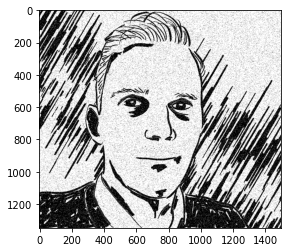

In [23]:
decode_image(img_gray, f = 0.1, show_image = True, show_org_image = False)